In [2]:
from archive.loading import load_module

In [2]:
model = load_module(module_path="model_test")

[INFO] : find model directory [model_test]
[INFO] : find module data file [model_test/module_data.pth]
[INFO] : find source code of [EfficientNetFoodClassifier] in [model_test/efficientnetv1.py]
[INFO] : Reconstruct the Class Object [EfficientNetFoodClassifier]
[INFO] : Insert [5,292,391] Parameters inside [EfficientNetFoodClassifier]
[INFO] : Reconstruct Model Object Successfully !


/home/widium/.conda/envs/tf_gpu/lib/python3.8/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552411/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNetFoodClassifier (EfficientNetFoodClassifier)      [32, 3, 224, 224]    [32, 3]              1,281,000            Partial
├─Sequential (features_extractor)                            [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

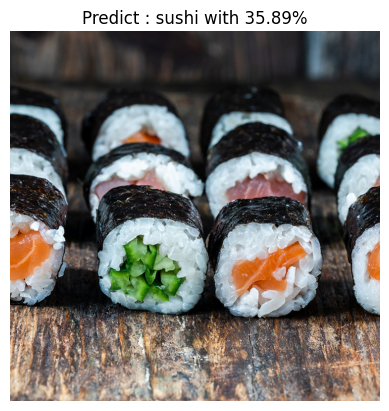

In [3]:
import wget
import sys
sys.path.append("..")
from torchinfo import summary
from torchvision.models import EfficientNet_B0_Weights
from prediction.custom import inference_image_classification

# Get the Weight of Model `DEFAULT` == last best version
weights = EfficientNet_B0_Weights.DEFAULT


image_transformer = weights.transforms()
class_names = ['pizza', 'steak', 'sushi']

img_path = wget.download("https://img.cuisineaz.com/660x660/2013/12/20/i8238-maki-sushi.jpeg")



model.to("cpu")

inference_image_classification(model=model,
                               img_path=img_path,
                               pipeline=image_transformer,
                               class_names=class_names)


# plot the model
summary(
    model=model, 
    input_size=(32, 3, 224, 224),
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"]
) 